In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('train_set_nostandard.csv')
training_set = dataset_train.iloc[:, 1:].values

      date  T10Y3M  curvature  BAMLCC0A1AAATRIV  DPRIME  VIXCLS          DJIA  \
0        0    1.35       0.21            207.57    8.25   21.14   6442.490234   
1        1    1.35       0.21            207.86    8.25   19.13   6544.089844   
2        2    1.37       0.23            207.66    8.25   19.89   6567.180176   
3        3    1.41       0.23            207.38    8.25   19.35   6600.660156   
4        4    1.44       0.26            207.16    8.25   20.24   6549.479980   
5        5    1.39       0.23            207.98    8.25   20.91   6625.669922   
6        6    1.46       0.32            206.76    8.25   19.63   6703.790039   
7        7    1.55       0.43            206.93    8.25   19.84   6709.180176   
8        8    1.34       0.24            208.04    8.25   19.27   6762.290039   
9        9    1.37       0.27            208.07    8.25   19.40   6726.879883   
10      10    1.41       0.27            207.57    8.25   19.61   6765.370117   
11      11    1.42       0.3

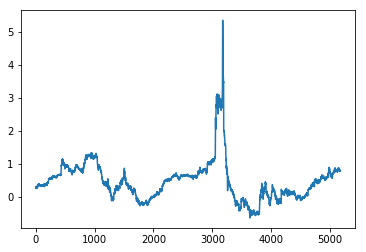

In [3]:
print(dataset_train)
plt.plot(training_set[:,-1])

[[0.47916667 0.67866324 0.00381123 ... 0.00207873 0.01621154 0.15141431]
 [0.47916667 0.67866324 0.00449348 ... 0.00610628 0.01587814 0.1547421 ]
 [0.48333333 0.68380463 0.00402296 ... 0.00636612 0.01662829 0.15141431]
 ...
 [0.52291667 0.51156812 0.95087752 ... 0.96258282 0.861035   0.23627288]
 [0.51041667 0.50642674 0.95226556 ... 0.96323243 0.87750701 0.24126456]
 [0.50625    0.49100257 0.95391239 ... 0.95400806 0.85511716 0.24126456]]


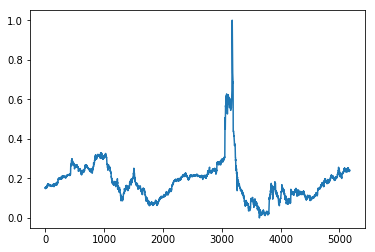

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#training_set_scaled =training_set
print(training_set_scaled)
plt.plot(training_set_scaled[:,-1])

In [5]:
n=dataset_train.shape[0]
m=3 # the better value for m is 60

X_train = []
y_train = []
for i in range(m+1, n):
    X_train.append(np.concatenate((training_set_scaled[i-1, 0:-1],training_set_scaled[i-m-1:i-1, -1])))
    #X_train.append(training_set_scaled[i-1, 0:-1])
    y_train.append(training_set_scaled[i, -1])
#print(X_train)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(5170, 28, 1)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [28]:
u=100
d=0.3
regressor = Sequential()

regressor.add(LSTM(units = u, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u))
regressor.add(Dropout(d))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 8, batch_size = 8)

Epoch 1/8
5170/5170 [==============================] - 40s 8ms/step - loss: 0.0085
Epoch 2/8
5170/5170 [==============================] - 38s 7ms/step - loss: 0.0017
Epoch 3/8
5170/5170 [==============================] - 38s 7ms/step - loss: 5.9728e-04
Epoch 4/8
5170/5170 [==============================] - 38s 7ms/step - loss: 5.8720e-04
Epoch 5/8
5170/5170 [==============================] - 38s 7ms/step - loss: 5.7883e-04
Epoch 6/8
5170/5170 [==============================] - 38s 7ms/step - loss: 7.1948e-04
Epoch 7/8
5170/5170 [==============================] - 38s 7ms/step - loss: 5.7398e-04
Epoch 8/8
5170/5170 [==============================] - 38s 7ms/step - loss: 5.3932e-04


In [29]:
dataset_test = pd.read_csv('test_set_nostadard.csv')
real_price = dataset_test.iloc[:, -1].values

In [30]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dataset_total.index = dataset_total.date 

In [31]:
print(len(dataset_test))

575


In [32]:
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - m:,1:].values
inputs

array([[ 1.56000e+00, -4.40000e-01,  6.10130e+02, ...,  9.60700e+01,
         9.63890e+02,  7.70000e-01],
       [ 1.50000e+00, -4.60000e-01,  6.10720e+02, ...,  9.61200e+01,
         9.79700e+02,  8.00000e-01],
       [ 1.48000e+00, -5.20000e-01,  6.11420e+02, ...,  9.54100e+01,
         9.58210e+02,  8.00000e-01],
       ...,
       [ 2.80000e-01, -4.00000e-02,  6.27910e+02, ...,  1.22470e+02,
         1.05219e+03,  7.90000e-01],
       [ 2.60000e-01, -1.00000e-01,  6.26220e+02, ...,  1.21770e+02,
         1.04808e+03,  8.00000e-01],
       [ 2.70000e-01, -1.10000e-01,  6.26150e+02, ...,  1.23050e+02,
         1.05908e+03,  7.90000e-01]])

In [33]:
inputs = sc.fit_transform(inputs)
inputs 

array([[0.72680412, 0.2892562 , 0.50619723, ..., 0.04287343, 0.17624902,
        0.8       ],
       [0.69587629, 0.27272727, 0.5167954 , ..., 0.04401368, 0.25895893,
        0.86666667],
       [0.68556701, 0.2231405 , 0.5293695 , ..., 0.02782212, 0.14653414,
        0.86666667],
       ...,
       [0.06701031, 0.61983471, 0.82557931, ..., 0.64492588, 0.6381899 ,
        0.84444444],
       [0.05670103, 0.57024793, 0.79522184, ..., 0.62896237, 0.61668846,
        0.86666667],
       [0.06185567, 0.56198347, 0.79396443, ..., 0.65815279, 0.67423489,
        0.84444444]])

In [34]:
X_test = []
n_t=dataset_test.shape[0]

In [35]:
for i in range(m+1, n_t):
    X_test.append(np.concatenate((inputs[i-1, 0:-1],inputs[i-m-1:i-1, -1])))
    #X_test.append(inputs[i-1, 0:-1])

In [36]:
for i in range(len(X_test)):
    X_test[i]=X_test[i].tolist()
    #lens.append(len(X_test[i]))

In [37]:
X_test=np.array(X_test)
X_test

array([[0.66494845, 0.19008264, 0.52972876, ..., 0.8       , 0.86666667,
        0.86666667],
       [0.66494845, 0.17355372, 0.49865278, ..., 0.86666667, 0.86666667,
        0.88888889],
       [0.64948454, 0.18181818, 0.53278247, ..., 0.86666667, 0.88888889,
        0.88888889],
       ...,
       [0.05154639, 0.5785124 , 0.82234597, ..., 0.95555556, 1.        ,
        0.95555556],
       [0.06185567, 0.62809917, 0.81695707, ..., 1.        , 0.95555556,
        0.86666667],
       [0.07216495, 0.59504132, 0.81552003, ..., 0.95555556, 0.86666667,
        0.84444444]])

In [38]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(571, 28, 1)

In [39]:
#print(len(dataset_total)- len(dataset_test) - m)
#inputs = inputs.reshape(-1,1)
#print(type(inputs))

In [40]:
#print(X_test)
predicted_price = regressor.predict(X_test)

In [41]:
predicted_price

array([[0.8693992 ],
       [0.88745916],
       [0.8894403 ],
       [0.9045383 ],
       [0.8878188 ],
       [0.83160675],
       [0.771659  ],
       [0.6322379 ],
       [0.5868211 ],
       [0.5824536 ],
       [0.61422575],
       [0.6112703 ],
       [0.57547987],
       [0.548947  ],
       [0.58506453],
       [0.61869776],
       [0.5662763 ],
       [0.5433109 ],
       [0.55401456],
       [0.56147766],
       [0.56245804],
       [0.5905595 ],
       [0.5573182 ],
       [0.5564246 ],
       [0.57332516],
       [0.5791272 ],
       [0.61116815],
       [0.57750213],
       [0.5471054 ],
       [0.50578004],
       [0.5113468 ],
       [0.46845707],
       [0.41331458],
       [0.41296005],
       [0.4367557 ],
       [0.42083156],
       [0.4084288 ],
       [0.4053222 ],
       [0.3879333 ],
       [0.38193676],
       [0.37891975],
       [0.3940227 ],
       [0.38652718],
       [0.39336517],
       [0.40107483],
       [0.41575268],
       [0.40817937],
       [0.431

In [42]:
a=real_price.reshape(-1,1)

In [43]:
a=sc.fit_transform(a)

In [44]:
#print(predicted_price)
#print(real_price)
predicted_price = sc.inverse_transform(predicted_price)
#predicted_price=np.array(predicted_price).reshape(1,-1)[0]
print(predicted_price)

[[0.80122966]
 [0.80935663]
 [0.81024814]
 [0.81704223]
 [0.80951846]
 [0.784223  ]
 [0.75724655]
 [0.69450706]
 [0.67406946]
 [0.6721041 ]
 [0.6864016 ]
 [0.68507165]
 [0.66896594]
 [0.6570262 ]
 [0.67327905]
 [0.688414  ]
 [0.66482437]
 [0.6544899 ]
 [0.6593065 ]
 [0.66266495]
 [0.66310614]
 [0.67575175]
 [0.6607932 ]
 [0.6603911 ]
 [0.66799635]
 [0.6706072 ]
 [0.6850257 ]
 [0.669876  ]
 [0.65619737]
 [0.637601  ]
 [0.6401061 ]
 [0.6208057 ]
 [0.59599155]
 [0.59583205]
 [0.60654   ]
 [0.5993742 ]
 [0.593793  ]
 [0.592395  ]
 [0.58457   ]
 [0.58187157]
 [0.5805139 ]
 [0.5873102 ]
 [0.5839372 ]
 [0.5870143 ]
 [0.59048367]
 [0.5970887 ]
 [0.59368074]
 [0.6041032 ]
 [0.60952616]
 [0.61747676]
 [0.62052625]
 [0.6150377 ]
 [0.6243616 ]
 [0.6171298 ]
 [0.6057772 ]
 [0.62042665]
 [0.6042533 ]
 [0.59384024]
 [0.5844711 ]
 [0.5873886 ]
 [0.5955416 ]
 [0.5822135 ]
 [0.5730616 ]
 [0.5707435 ]
 [0.5946433 ]
 [0.6335224 ]
 [0.6357193 ]
 [0.6193315 ]
 [0.61202633]
 [0.61736625]
 [0.62029296]
 [0.64

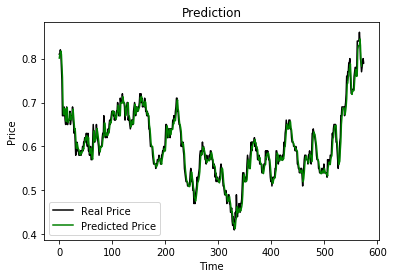

In [45]:
plt.plot(real_price, color = 'black', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

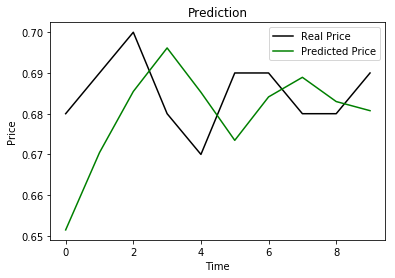

In [46]:
plt.plot(real_price[140:150], color = 'black', label = 'Real Price')
plt.plot(predicted_price[140:150], color = 'green', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

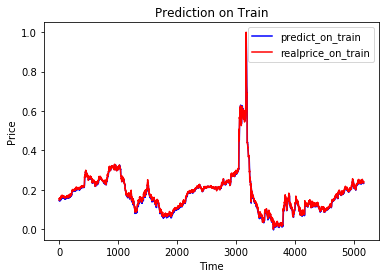

In [47]:
predict_on_train=regressor.predict(X_train)
realprice_on_train=y_train
plt.plot(predict_on_train, color = 'blue', label = 'predict_on_train')
plt.plot(realprice_on_train, color = 'red', label = 'realprice_on_train')
plt.title('Prediction on Train')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

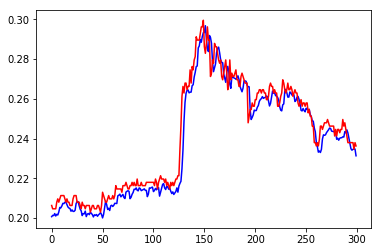

In [48]:
plt.plot(predict_on_train[300:600], color = 'blue', label = 'predict_on_train')
plt.plot(realprice_on_train[300:600], color = 'red', label = 'realprice_on_train')